In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("/content/HousingData.csv")

In [12]:
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [7]:
df.shape

(506, 14)

In [9]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [11]:
print(df.drop(columns=["MEDV"]).values.shape)

(506, 13)


In [13]:
df["MEDV"].values

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [14]:
print(df.keys())

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [15]:
x = pd.DataFrame(df.drop(columns=["MEDV"]).values, columns = df.drop(columns=["MEDV"]).columns)
y = pd.DataFrame(df["MEDV"].values)

In [16]:
x.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,NaN
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [17]:
y.head(10)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


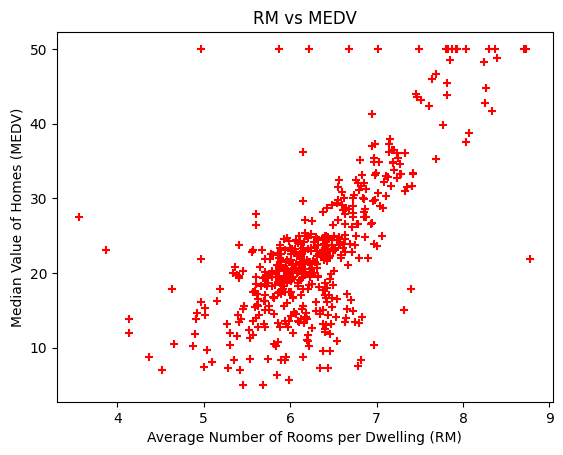

In [20]:
# %matplotlib inline
# import matplotlib.pyplot as plt

plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median Value of Homes (MEDV)')

plt.scatter(df['RM'], df['MEDV'], color='red', marker='+')
plt.title('RM vs MEDV')
plt.show()


In [34]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or median, most_frequent
x = imputer.fit_transform(x)


In [35]:
reg = linear_model.LinearRegression()

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [37]:
reg.fit(x_train, y_train)

LinearRegression()

In [38]:
print(reg.coef_)

[[-1.14139919e-01  2.90156278e-02 -2.71329054e-02  3.24067342e+00
  -1.60175433e+01  4.75240956e+00 -1.95196142e-02 -1.52159267e+00
   2.22822577e-01 -9.15063665e-03 -8.86045288e-01  1.22626115e-02
  -4.38440425e-01]]


In [39]:
reg.fit(x_train, y_train)
print(reg.score(x_test, y_test))

0.6588520195508147


In [40]:
y_pred = reg.predict(x_test)
print(y_pred)


[[ 2.91432496e+01]
 [ 3.65356675e+01]
 [ 1.44925129e+01]
 [ 2.50811104e+01]
 [ 1.84560923e+01]
 [ 2.30104937e+01]
 [ 1.81386861e+01]
 [ 1.46265167e+01]
 [ 2.21158938e+01]
 [ 2.08706364e+01]
 [ 2.50758640e+01]
 [ 1.87470982e+01]
 [-5.67498472e+00]
 [ 2.17286655e+01]
 [ 1.90464014e+01]
 [ 2.54293420e+01]
 [ 1.96620047e+01]
 [ 6.12420178e+00]
 [ 4.09972355e+01]
 [ 1.72352716e+01]
 [ 2.48905259e+01]
 [ 3.02961849e+01]
 [ 1.18008779e+01]
 [ 2.29655895e+01]
 [ 1.73451595e+01]
 [ 1.51051621e+01]
 [ 2.10901065e+01]
 [ 1.44883316e+01]
 [ 2.30923960e+01]
 [ 1.94365043e+01]
 [ 2.25439953e+01]
 [ 2.52375663e+01]
 [ 2.59309510e+01]
 [ 1.66289054e+01]
 [ 1.64513986e+01]
 [ 1.66143478e+01]
 [ 3.11105960e+01]
 [ 2.02837991e+01]
 [ 2.43569451e+01]
 [ 2.26326769e+01]
 [ 1.45257750e+01]
 [ 3.23698301e+01]
 [ 4.30428488e+01]
 [ 1.76390763e+01]
 [ 2.76326197e+01]
 [ 1.64305143e+01]
 [ 1.42484248e+01]
 [ 2.61635938e+01]
 [ 1.97678160e+01]
 [ 3.01463483e+01]
 [ 2.09688785e+01]
 [ 3.38338873e+01]
 [ 1.6416139